In [1]:
import numpy as np
import pandas as pd

import sys, os, time
import glob

from matplotlib import pyplot as plt
%matplotlib inline

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2

# widgets and interaction
from ipywidgets import FloatProgress
from IPython.display import display, clear_output

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

from skimage.io import imread, imsave

import warnings
warnings.filterwarnings('ignore')

import gzip
import cPickle as pickle

In [2]:
import re
def parse_list(s):
    s = re.sub('\s+', ' ', s[1:-1]).strip().replace(",",' ')
    s = re.sub('\s+', ' ', s)
    # print s.split(" ")
    if len(s.split(" "))>0:
        ret = [float(n.strip()) for n in s.split(" ")]
    return ret

# Real cities

In [13]:
files_df = pd.read_csv("/home/data/world-cities/urban_areas_over_10kpop_stats.csv")
cols_to_parse = ["patch distr", "top patch areas", "box counts"]
for c in files_df.columns:
    if len([x for x in cols_to_parse if x in c])>0:
        files_df[c] = files_df[c].apply(parse_list)
files_df.head(2)

,Unnamed: 0,filename,class,country,population,city,region,source,build pct 128,patch distr 128,...,patch distr 286,top patch areas 286,fractal dim 286,box counts 286,build pct 64,patch distr 64,top patch areas 64,fractal dim 64,box counts 64,decile
0,0,/home/data/world-cities/urban_areas_over_10kpo...,very-small,us,44071,"saint louis park, us (pop 44.1k)",Americas,SAR,0.047048,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[3.66356165, 2.99573227, 2.56494936, 2.9444389...","[800.0, 44.0, 30.0, 29.0, 28.0, 25.0, 23.0, 20...",1.377339,"[1.38629436, 2.19722458, 3.21887582, 4.3567088...",0.046378,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.096326,"[0.0, 1.38629436, 1.79175947, 2.39789527, 2.89...",6
1,1,/home/data/world-cities/urban_areas_over_10kpo...,very-small,us,44174,"pittsfield, us (pop 44.2k)",Americas,SAR,0.040769,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[3.33220451, 2.7080502, 2.30258509, 2.30258509...","[227.0, 132.0, 50.0, 47.0, 37.0, 32.0, 29.0, 2...",1.334656,"[1.38629436, 2.19722458, 3.21887582, 4.2341065...",0.039897,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.259199,"[0.0, 1.38629436, 2.19722458, 2.63905733, 2.89...",6


In [4]:
files_df.columns

Index([u'Unnamed: 0', u'filename', u'class', u'country', u'population',
       u'city', u'region', u'build pct 128', u'patch distr 128',
       u'top patch areas 128', u'fractal dim 128', u'box counts 128',
       u'build pct 286', u'patch distr 286', u'top patch areas 286',
       u'fractal dim 286', u'box counts 286', u'build pct 64',
       u'patch distr 64', u'top patch areas 64', u'fractal dim 64',
       u'box counts 64', u'decile'],
      dtype='object')

### Avg built area

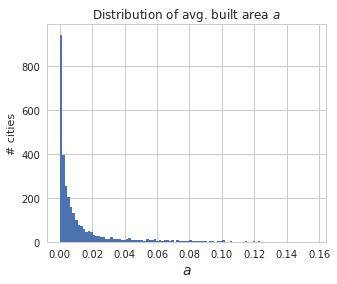

In [5]:
files_df['build pct 286'].hist(bins=100, figsize=(5,4))
plt.title("Distribution of avg. built area $a$")
plt.xlabel("$a$", fontsize=14)
plt.ylabel("# cities")

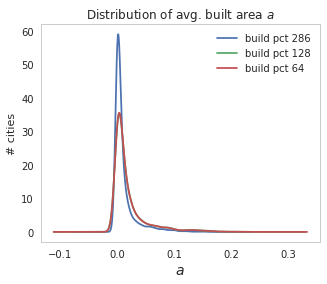

In [6]:
files_df['build pct 286'].plot.kde(figsize=(5,4))
files_df['build pct 128'].plot.kde(figsize=(5,4))
files_df['build pct 64'].plot.kde()
plt.legend(loc="best")

plt.title("Distribution of avg. built area $a$")
plt.xlabel("$a$", fontsize=14)
plt.ylabel("# cities")

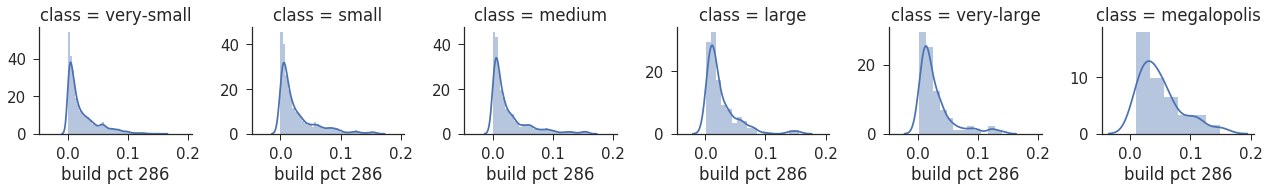

In [14]:
sns.set_context("notebook", font_scale=1.5)
g = sns.FacetGrid(files_df, col="class", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 286")


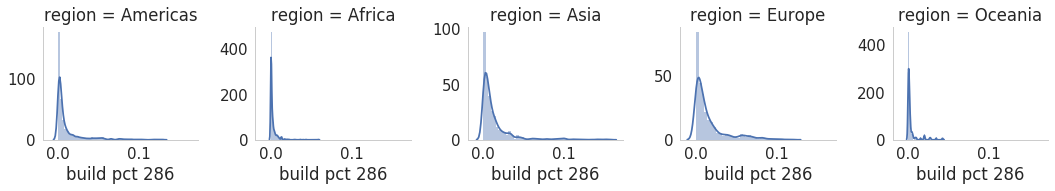

In [8]:
g = sns.FacetGrid(files_df, col="region", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 286")

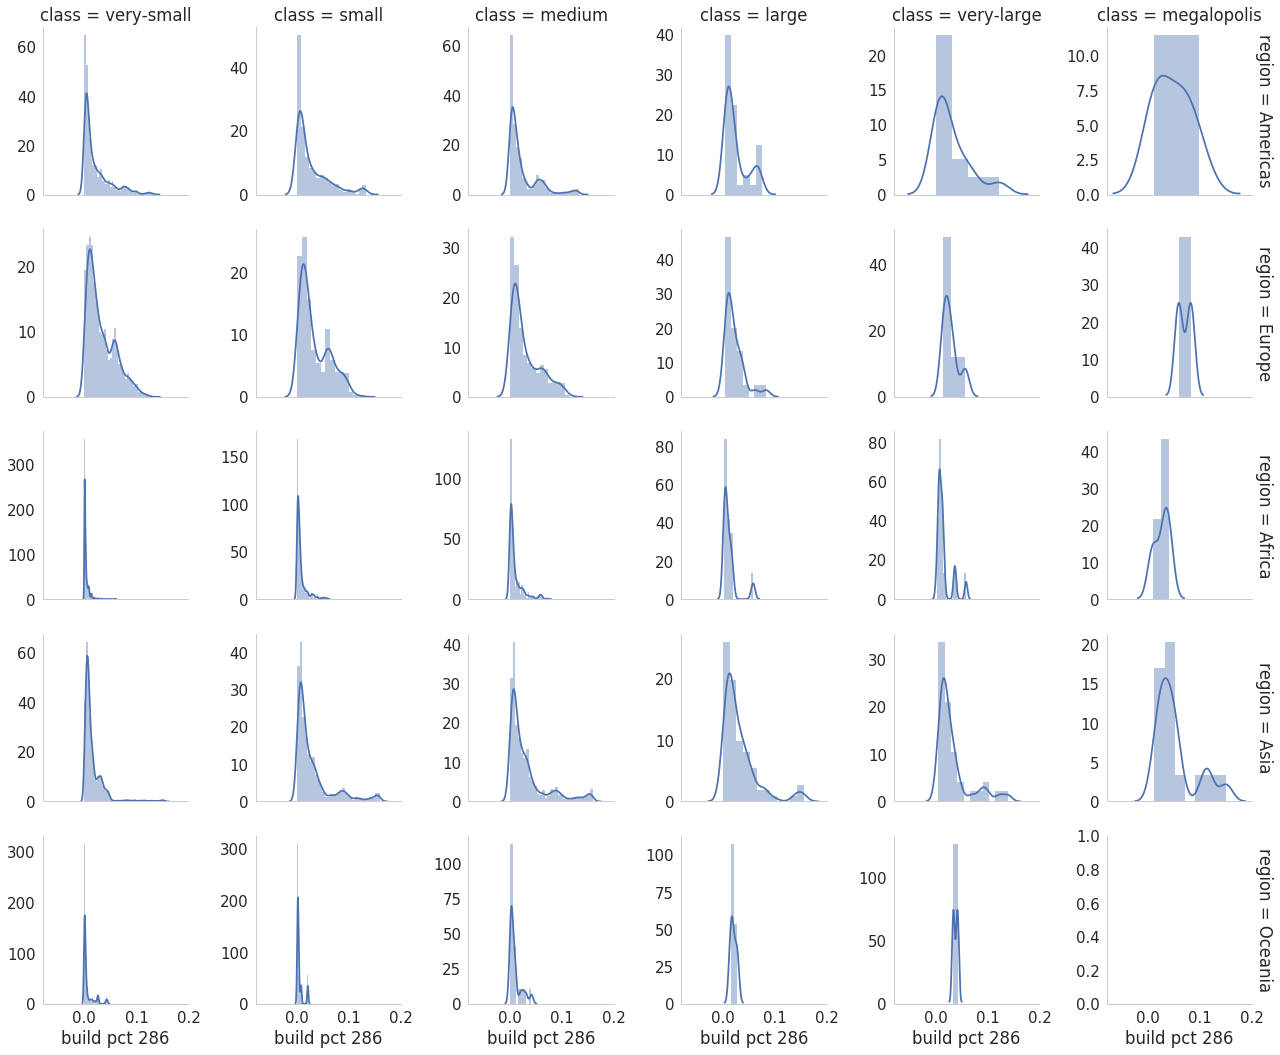

In [12]:
g = sns.FacetGrid(files_df, col="class", row="region", margin_titles=True, sharey=False)
g.map(sns.distplot, "build pct 286")


### Fractal dimension

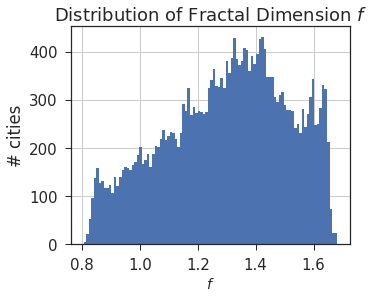

In [15]:
files_df['fractal dim 286'].hist(bins=100, figsize=(5,4))
plt.title("Distribution of Fractal Dimension $f$")
plt.xlabel("$f$", fontsize=14)
plt.ylabel("# cities")

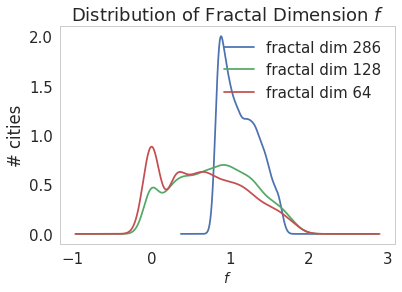

In [10]:
files_df['fractal dim 286'].plot.kde(figsize=(6,4))
files_df['fractal dim 128'].plot.kde(figsize=(6,4))
files_df['fractal dim 64'].plot.kde()
plt.legend(loc="best")

plt.title("Distribution of Fractal Dimension $f$")
plt.xlabel("$f$", fontsize=14)
plt.ylabel("# cities")

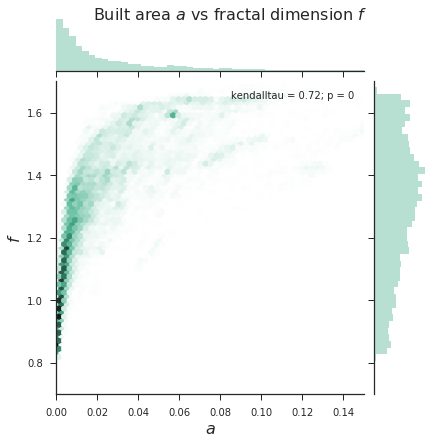

In [16]:
from scipy.stats import kendalltau
sns.set_context("notebook", font_scale=1.5)
sns.set(style="ticks")

g = sns.jointplot(files_df['build pct 286'].values, 
              files_df['fractal dim 286'].values, xlim=(0,0.15), ylim=(0.7,1.7),
              kind="hex", stat_func=kendalltau, color="#4CB391")
g.fig.suptitle("Built area $a$ vs fractal dimension $f$", fontsize=16)
g.ax_joint.set_xlabel("$a$", fontsize=16)
g.ax_joint.set_ylabel("$f$", fontsize=16)

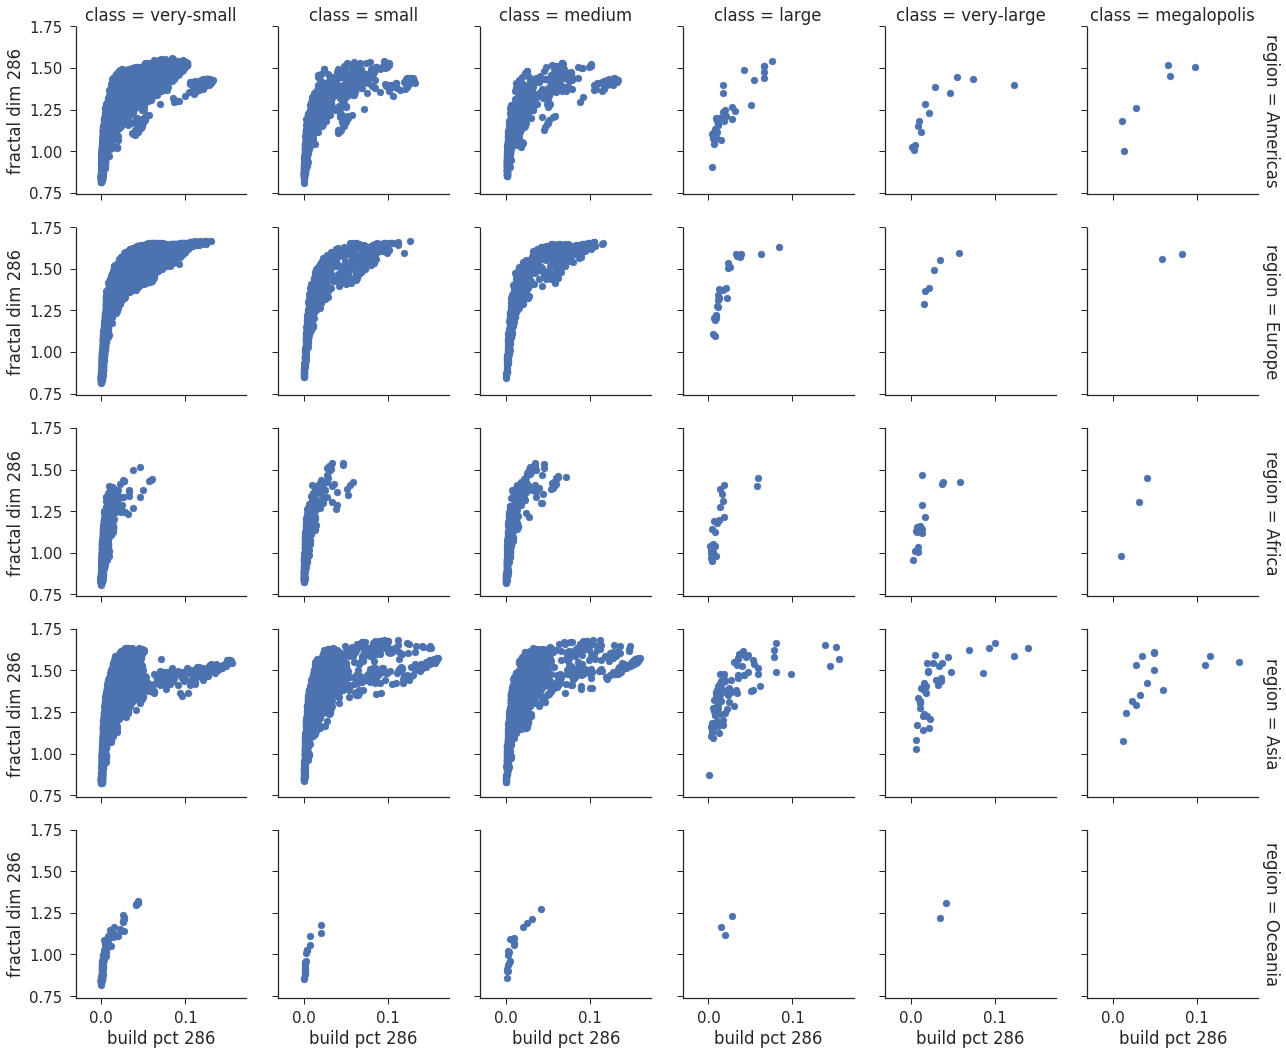

In [23]:
sns.set_context("notebook", font_scale=1.5)
g = sns.FacetGrid(files_df, col="class", row="region", margin_titles=True, sharey=True)
g.map(sns.plt.scatter, "build pct 286", "fractal dim 286")


### Focus on images with more than 1% built fraction

In [25]:
files_df_sel = files_df[files_df['build pct 286']>0.01]

print len(files_df_sel)

14568


### Distribution of patch areas

In [27]:
bins = np.logspace(1, 6, 20, base=np.exp(1))

In [28]:
area_counts = np.array([list(x) for x in files_df_sel['patch distr 286']])
area_counts.shape, (area_counts.sum(1)>0).sum()

((14568, 19), 14568)

In [29]:
area_counts_df = pd.DataFrame(np.vstack([
    area_counts.flatten(), np.tile(range(area_counts.shape[1]), area_counts.shape[0]).astype(int)])).T
area_counts_df.columns = ['log-count', 'bin']
area_counts_df['bin'] = area_counts_df['bin'].astype(int)

area_counts_df.shape

(276792, 2)

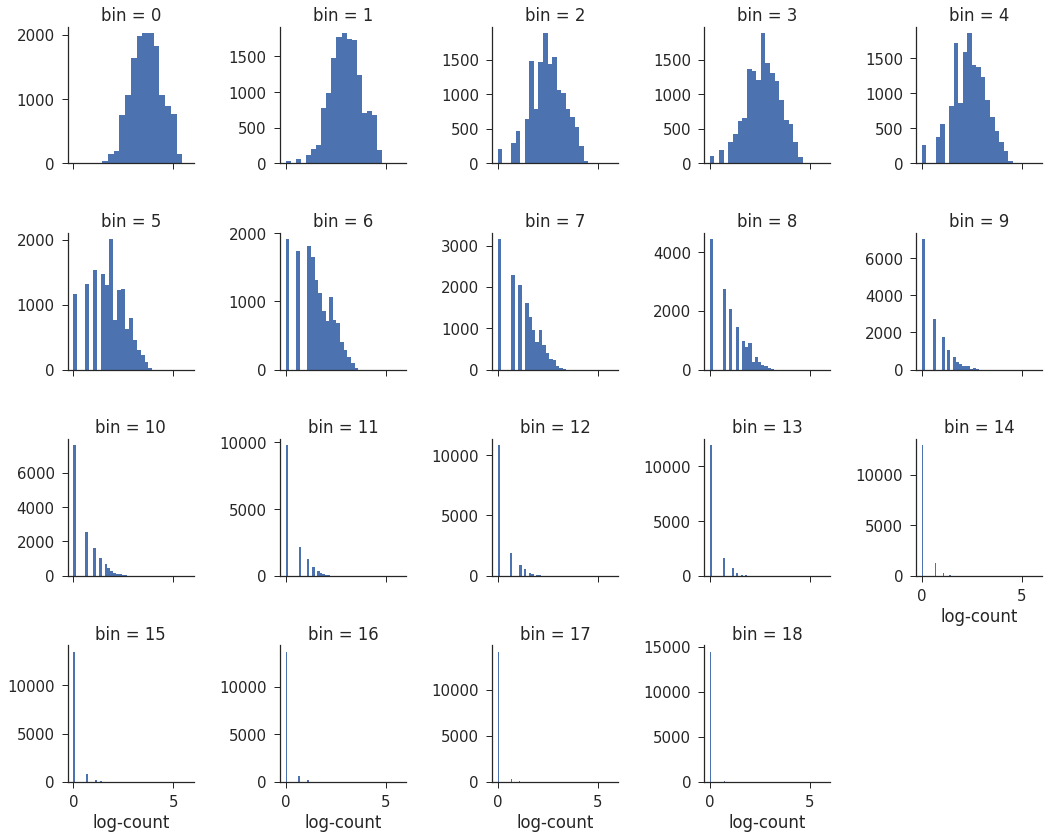

In [30]:
g = sns.FacetGrid(area_counts_df, col="bin", col_wrap=5, margin_titles=True, sharey=False)
g.map(sns.plt.hist, "log-count", bins=20)

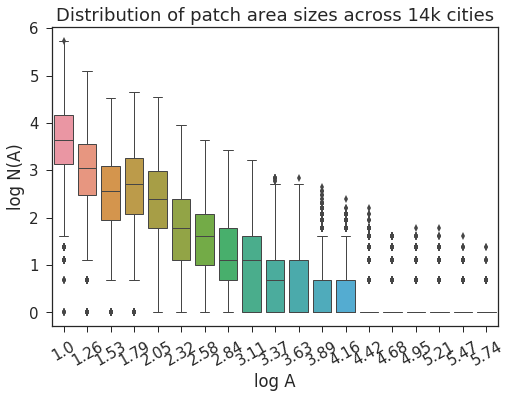

In [31]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

g = sns.boxplot(data=area_counts_df, y="log-count", x="bin")
_ = g.set_xticklabels(np.log(bins).round(2), rotation=30)
g.set_xlabel("log A")
g.set_ylabel("log N(A)")
g.set_title("Distribution of patch area sizes across 14k cities")

### Top 20 patches by area

In [32]:
top_areas = np.array([list(x) for x in files_df_sel['top patch areas 286']])
(top_areas.sum(1)>0).sum()

14568

In [33]:
top_areas_df = pd.DataFrame(np.vstack([
    np.log(top_areas.flatten() / float(286*286)), np.tile(range(top_areas.shape[1]), top_areas.shape[0]).astype(int)])).T
top_areas_df.columns = ['patch area', 'rank']
top_areas_df['rank'] = top_areas_df['rank'].astype(int)

top_areas_df.shape

(291360, 2)

In [34]:
top_areas_df.head()

,patch area,rank
0,-4.627372,0
1,-7.527794,1
2,-7.910786,2
3,-7.944688,3
4,-7.979779,4


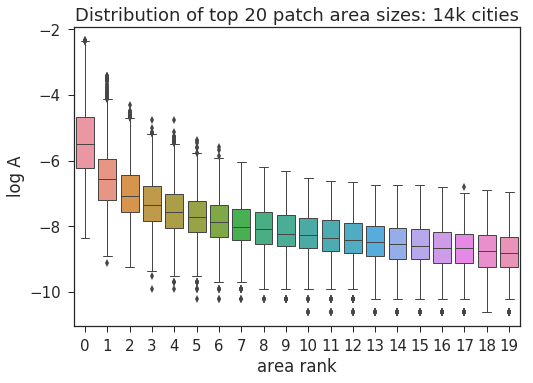

In [35]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

g = sns.boxplot(data=top_areas_df, y="patch area", x="rank")
g.set_xlabel('area rank')
g.set_ylabel("log A")
g.set_title("Distribution of top 20 patch area sizes: 14k cities")

### Box counts

In [37]:
box_counts = np.array([list(x) for x in files_df_sel['box counts 286']])
(box_counts.sum(1)>0).sum(), box_counts.shape

(14568, (14568, 7))

In [46]:
box_counts_df = pd.DataFrame(np.vstack([
    box_counts.flatten(), np.tile(range(box_counts.shape[1]), box_counts.shape[0]).astype(int)])).T
box_counts_df.columns = ['log (box count)', 'box size']

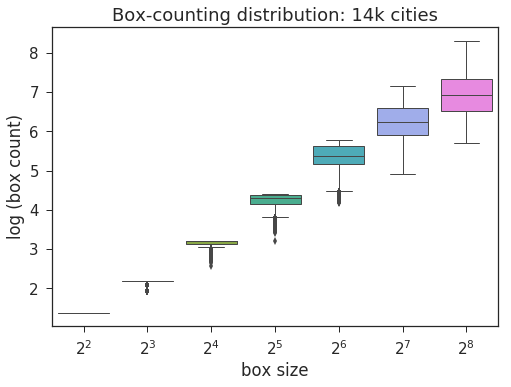

In [47]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})

g = sns.boxplot(data=box_counts_df, x="box size", y="log (box count)")
g.set_xlabel('box size')
g.set_ylabel("log (box count)")
g.set_xticklabels(["$2^%d$"%(2+i) for i in range(box_counts.shape[1])])
g.set_title("Box-counting distribution: 14k cities")

In [43]:
2**7

128

# Simulations

* Explore parameter space of the simulations: $\gamma_r$, $\gamma_u$, $\theta$, $t$ etc.

* 

In [ ]:
files_df = pd.read_csv("/home/data/world-cities/simulations_stats.csv")
cols_to_parse = ["patch distr", "top patch areas"]
for c in files_df.columns:
    if len([x for x in cols_to_parse if x in c])>0:
        files_df[c] = files_df[c].apply(parse_list)
files_df.head(2)

In [ ]:
files_df.shape

In [ ]:
files_sel = files_df[files_df['theta']>0.02]\
    .groupby(['Ue', 'gu', 'gr', 'theta', 'n', 'phase'], group_keys=False)\
    .apply(lambda x: x.sort('t', ascending=False).iloc[:(len(x)/2):5])


In [ ]:
# MPO San Diego, Joan Walker

# 